### Do the following in the iris dataset.
    1. Read the dataset to the python environment.
    2. Do necessary pre-processing steps.
    3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)


In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

### 1. Read the dataset to the python environment.

In [2]:
# Loading dataset

data=pd.read_excel('iris.xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.shape

(150, 5)

In [6]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


##### Inference:
    1. Dataset contains 5 features and 150 rows
    2. Data has 4 float datatype and one Object datatype

### 2. Do necessary pre-processing steps.

In [8]:
# Checking for missing values

data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

SL,SW and PL have null values

In [9]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

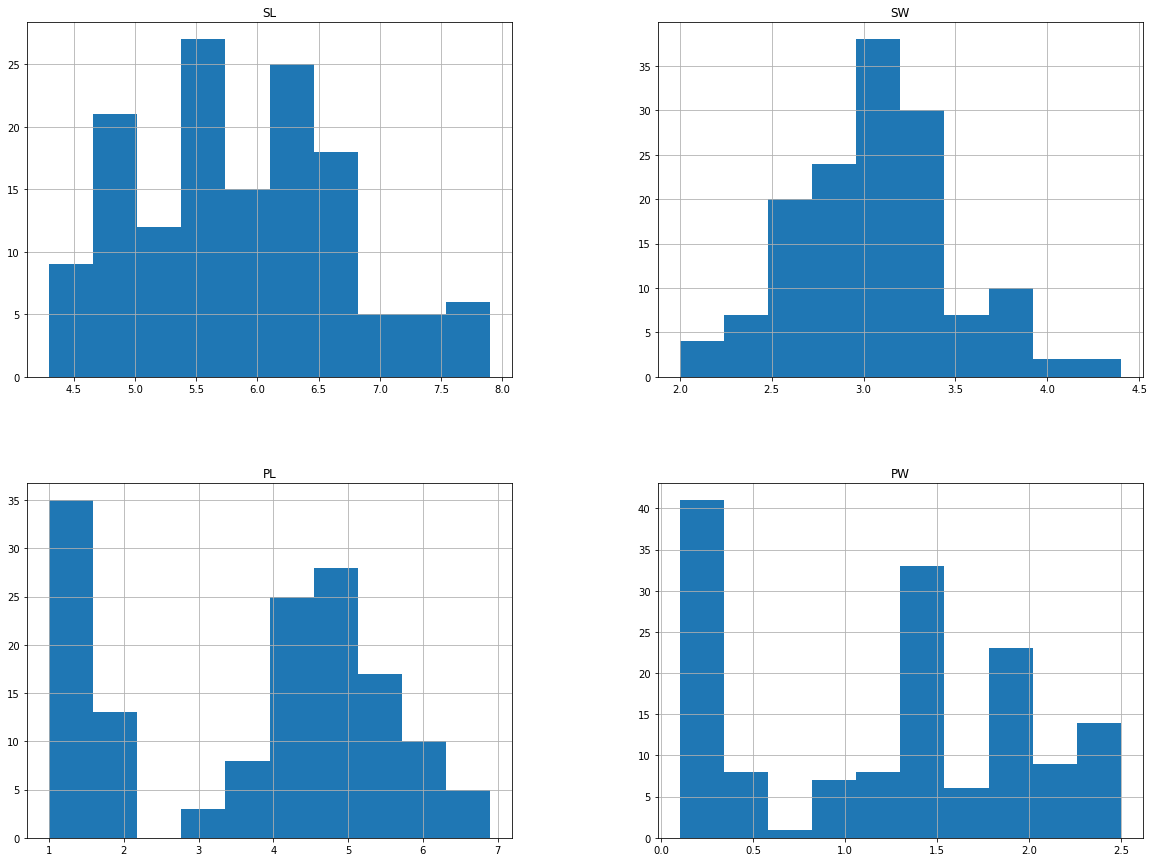

In [10]:
freqgraph=data[['SL','SW','PL','PW']]
freqgraph.hist(figsize=(20,15))
plt.show()

    > Since the data is not skewed, we cannot use median to fill missing values
    > From the histogram it can be seen that there are no outliers, so we can use mean of respective species to fill missing values

#### Handling missing values

In [11]:
data.groupby('Classification')[['SL','SW','PL']].mean()

,SL,SW,PL
Classification,,,
Iris-setosa,5.008511,3.408511,1.468750
Iris-versicolor,5.925000,2.781250,4.252083
Iris-virginica,6.616667,2.967347,5.547917


In [12]:
for x in data['Classification'].unique():
    for i in ['SL']:
        data[i]=data[i].fillna(data[data['Classification']==x]['SL'].mean()) 
    for i in ['SW']:
        data[i]=data[i].fillna(data[data['Classification']==x]['SW'].mean()) 
    for i in ['PL']:
        data[i]=data[i].fillna(data[data['Classification']==x]['PL'].mean()) 

In [13]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

#### Label Encoding

Since the output, i.e, classification is object type, converting it to numerical value using encoding 

In [14]:
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [15]:
# Import label encoder

from sklearn.preprocessing import LabelEncoder

In [16]:
# label_encoder object knows how to understand word labels.
label_encoder = LabelEncoder()
 
# Encode labels in column 'Classification'.
data['Classification']= label_encoder.fit_transform(data['Classification'])
 
data['Classification'].unique()

array([0, 1, 2])

In [17]:
data['Classification'].value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

In [18]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.008511,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


SL has too many decimal spaces, so rounding entire data to 2 decimal space

In [19]:
data=round(data,2)
data.head()

,SL,SW,PL,PW,Classification
0,5.10,3.5,1.4,0.2,0
1,4.90,3.0,1.4,0.2,0
2,5.01,3.2,1.3,0.2,0
3,4.60,3.1,1.5,0.2,0
4,5.00,3.6,1.4,0.2,0


#### Splitting the dataset

In [20]:
x=data.drop(['Classification'],axis=1) #input variables
y=data['Classification'] #target variable 

In [21]:
#Splitting data into train and test set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [22]:
x_train.shape

(120, 4)

In [23]:
x_test.shape

(30, 4)

In [24]:
y_train.shape

(120,)

In [25]:
y_test.shape

(30,)

#### Standard Scalar

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scalar = StandardScaler()

In [28]:
x_train = scalar.fit_transform(x_train)

In [29]:
x_test = scalar.transform(x_test)

### 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

##### Training the model

Using some of the commonly used algorithms, we will be training our model to check how accurate every algorithm is. We will be implementing these algorithms to compare:

1] Logistic Regression

2] K – Nearest Neighbour (KNN)

3] Support Vector Machine (SVM)

4] Decision Trees

5] Gradient Boosting

6] Extreme Gradient Boosting

Let us start building our model and predicting accuracy of every algorithm used. We can also check which gives the best result.

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#### Logistic Regression

In [31]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
accuracy is 0.9666666666666667


#### K-Nearest Neighbors

In [32]:

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
accuracy is 0.9666666666666667


#### SVM (Support Vector Machines)

In [33]:
svm = SVC()
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy is 1.0


#### Decision Tree

In [34]:
dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy is 1.0


#### Gradient boosting

In [35]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

y_pred = gb.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy is 1.0


#### Extreme Gradient Boosting

In [36]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

[11:19:34] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy is 1.0


##### Inference:
    All algorithms have shown high degree of accuracy, with SVM,Decision tree,Gradient boosting and Extreme gradient boosting having perfect score of 1.
    There are no false positives or false negatives for the algorithms SVM,Decision tree,Gradient boosting and Extreme gradient boosting 

#### Random Forest

In [37]:
# Building Model

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [38]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy is 1.0


In [39]:
# Feature Importance

In [40]:
pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100

PW    56.311265
PL    30.257632
SL     9.863939
SW     3.567164
dtype: float64

In [41]:
# from the above data it can be seen that SW has least importance in the prediction mode. Dropping the same and rebuilding the model

In [42]:
x1=x.drop(['SW'],axis=1) #input variables
y1=y #target variable 

In [43]:
#Splitting data into train and test set

x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=42,test_size=0.2)

In [44]:
# Normalising values

x1_train = scalar.fit_transform(x1_train)
x1_test = scalar.transform(x1_test)

In [45]:
# Building Model

rf1=RandomForestClassifier()
rf1.fit(x1_train,y1_train)
y1_pred=rf1.predict(x1_test)

In [46]:
# Summary of the predictions made by the classifier
print(classification_report(y1_test, y1_pred))
print(confusion_matrix(y1_test, y1_pred))
# Accuracy score

print('accuracy is',accuracy_score(y1_pred,y1_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy is 1.0


##### Inference
     3-feature dataset performs equally good as a 4-feature dataset

#### Distribution of prediction probabilities

In [47]:
from sklearn.metrics import f1_score,confusion_matrix

In [48]:
# Finding best threshold value to get maximum f score

f=0
for t in np.arange(0, 1, 0.01): 
        threshold=t
        y_pred_prob=rf.predict_proba(x_test)[:,1] 
        y_pred=(y_pred_prob>threshold).astype(int) 
        k=f1_score(y_test,y_pred, average='weighted')
        if k>f:
            f=k
            y=t        
print('F1 score:',f,'Threshold',y)  

F1 score: 0.5150537634408602 Threshold 0.12


In [50]:
threshold=0.12 #assigning threshold
y_pred_prob=rf.predict_proba(x_test)[:,1] #predict probability value
y_pred=(y_pred_prob>threshold).astype(int) 
#compared probability value with threshold value if its greater will convert toint

In [51]:
f1_score(y_test,y_pred,average='weighted')

0.5150537634408602

#### Fine tuning of hyper parameter

In [52]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [53]:
rft=RandomForestClassifier(n_estimators=500,max_depth=10,random_state=42,criterion='entropy')

In [54]:
rft.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=500,
                       random_state=42)

In [55]:
y_pred=rft.predict(x_test)
f1_score(y_test,y_pred,average='weighted')

1.0

##### Inference:
    By changing few of hyperparameters like criterion='entropy', max_depth=10, n_estimators=500,random_state=42 we got the perfect f1 score for the model